In [260]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# 1-loading and analayzing the data

In [261]:
dataset= pd.read_csv('/Users/asalzooashkiany/Downloads/heart_2022_with_nans.csv')

In [262]:
dataset.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [263]:
len(dataset)

445132

In [264]:
dataset.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [265]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [266]:
total_nulls = dataset.isnull().sum()
total_nulls

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

## Highly Relevant Features

These features are directly related to cardiovascular health and have been commonly studied in the context of predicting heart attack risks:

**HadHeartAttack:** Past history of heart attacks is a significant predictor for future cardiac events.

**HadAngina:** Angina pectoris (chest pain) is a symptom of coronary artery disease, which is a precursor to heart attacks.

**PhysicalHealthDays:** The number of days with poor physical health can indicate underlying health issues, including those related to the heart.

**PhysicalActivities:** A lower level of physical activity is associated with higher cardiovascular risk.

**HadStroke:** Past stroke events are linked with an increased risk of heart attacks due to shared risk factors like hypertension and atherosclerosis.

**HadDiabetes:** Diabetes is a well-known risk factor for cardiovascular diseases including heart attacks.
**SmokerStatus:** Smoking is a major risk factor for numerous health problems, including heart attacks.



## Moderately Relevant Features
These features may indirectly relate to heart health through their impact on overall health or specific related conditions:

**GeneralHealth:** General poor health might be correlated with increased risk but is less specific than other indicators.

**SleepHours:** Sleep duration has been linked with heart health, where both too little and too much sleep can increase cardiovascular risk.

**HadDepressiveDisorder:** There's growing evidence linking depression with increased risk of cardiovascular diseases.

**HadCOPD:** Chronic obstructive pulmonary disease can exacerbate the burden on the heart, although it's more a consequence than a cause.

**HadKidneyDisease:** Kidney disease can affect heart health due to related complications like hypertension.

**HadArthritis:** While not directly linked, systemic inflammation (like that in rheumatoid arthritis) can contribute to heart disease.

**LastCheckupTime:** Frequency of health checkups might reflect awareness and management of health conditions, potentially influencing heart health.

## Less Relevant Features
These features are unlikely to have a direct impact on heart attack risks but might be useful for demographic stratifications or other indirect insights:

**Sex, AgeCategory, RaceEthnicityCategory:** Important for demographic adjustments in the model but not direct predictors.



In [267]:
# List of columns to keep
columns_to_keep = [
    'HadHeartAttack', 'HadAngina', 'PhysicalHealthDays', 'PhysicalActivities',
    'HadStroke', 'HadDiabetes', 'SmokerStatus', 'GeneralHealth', 'SleepHours',
    'HadDepressiveDisorder', 'HadCOPD', 'HadKidneyDisease', 'HadArthritis',
    'LastCheckupTime', 'Sex', 'AgeCategory'
]

# Filter the DataFrame to keep only the specified columns
df_filtered = dataset[columns_to_keep]

# Optionally, save the filtered DataFrame to a new CSV file
df_filtered.to_csv('filtered_dataset.csv', index=False)


In [268]:
df=df_filtered 

In [269]:
df

,HadHeartAttack,HadAngina,PhysicalHealthDays,PhysicalActivities,HadStroke,HadDiabetes,SmokerStatus,GeneralHealth,SleepHours,HadDepressiveDisorder,HadCOPD,HadKidneyDisease,HadArthritis,LastCheckupTime,Sex,AgeCategory
0,No,No,0.0,No,No,Yes,Never smoked,Very good,8.0,No,No,No,No,Within past year (anytime less than 12 months ...,Female,Age 80 or older
1,No,No,0.0,No,No,No,Never smoked,Excellent,6.0,No,No,No,No,NaN,Female,Age 80 or older
2,No,No,2.0,Yes,No,No,Never smoked,Very good,5.0,No,No,No,No,Within past year (anytime less than 12 months ...,Female,Age 55 to 59
3,No,No,0.0,Yes,No,No,Current smoker - now smokes some days,Excellent,7.0,No,No,No,Yes,Within past year (anytime less than 12 months ...,Female,NaN
4,No,No,2.0,Yes,No,No,Never smoked,Fair,9.0,No,No,No,No,Within past year (anytime less than 12 months ...,Female,Age 40 to 44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,No,No,0.0,Yes,No,No,Never smoked,Good,6.0,Yes,No,No,No,Within past 2 years (1 year but less than 2 ye...,Female,Age 18 to 24
445128,No,No,2.0,Yes,No,No,Never smoked,Excellent,7.0,No,No,No,No,Within past year (anytime less than 12 months ...,Female,Age 50 to 54
445129,No,No,30.0,No,No,No,Current smoker - now smokes every day,Poor,5.0,No,No,No,No,5 or more years ago,Female,Age 65 to 69
445130,Yes,No,0.0,No,No,No,Never smoked,Very good,5.0,No,No,No,No,Within past year (anytime less than 12 months ...,Male,Age 70 to 74


In [270]:
df.describe()

,PhysicalHealthDays,SleepHours
count,434205.000000,439679.000000
mean,4.347919,7.022983
std,8.688912,1.502425
min,0.000000,1.000000
25%,0.000000,6.000000
50%,0.000000,7.000000
75%,3.000000,8.000000
max,30.000000,24.000000


describe after encoding 

In [271]:
df.describe()

,PhysicalHealthDays,SleepHours
count,434205.000000,439679.000000
mean,4.347919,7.022983
std,8.688912,1.502425
min,0.000000,1.000000
25%,0.000000,6.000000
50%,0.000000,7.000000
75%,3.000000,8.000000
max,30.000000,24.000000


In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   HadHeartAttack         442067 non-null  object 
 1   HadAngina              440727 non-null  object 
 2   PhysicalHealthDays     434205 non-null  float64
 3   PhysicalActivities     444039 non-null  object 
 4   HadStroke              443575 non-null  object 
 5   HadDiabetes            444045 non-null  object 
 6   SmokerStatus           409670 non-null  object 
 7   GeneralHealth          443934 non-null  object 
 8   SleepHours             439679 non-null  float64
 9   HadDepressiveDisorder  442320 non-null  object 
 10  HadCOPD                442913 non-null  object 
 11  HadKidneyDisease       443206 non-null  object 
 12  HadArthritis           442499 non-null  object 
 13  LastCheckupTime        436824 non-null  object 
 14  Sex                    445132 non-nu

In [273]:
df.isnull().sum()

HadHeartAttack            3065
HadAngina                 4405
PhysicalHealthDays       10927
PhysicalActivities        1093
HadStroke                 1557
HadDiabetes               1087
SmokerStatus             35462
GeneralHealth             1198
SleepHours                5453
HadDepressiveDisorder     2812
HadCOPD                   2219
HadKidneyDisease          1926
HadArthritis              2633
LastCheckupTime           8308
Sex                          0
AgeCategory               9079
dtype: int64

# 2- checking and handelin Nulls

In [274]:
SmokerStatus_null = df[df['SmokerStatus'].isnull()]
SmokerStatus_null.head()

,HadHeartAttack,HadAngina,PhysicalHealthDays,PhysicalActivities,HadStroke,HadDiabetes,SmokerStatus,GeneralHealth,SleepHours,HadDepressiveDisorder,HadCOPD,HadKidneyDisease,HadArthritis,LastCheckupTime,Sex,AgeCategory
15,No,No,0.0,Yes,No,No,NaN,Excellent,8.0,No,No,No,No,Within past year (anytime less than 12 months ...,Female,Age 65 to 69
22,No,Yes,30.0,Yes,No,No,NaN,Fair,7.0,No,No,No,Yes,Within past year (anytime less than 12 months ...,Female,Age 80 or older
38,Yes,No,8.0,Yes,No,No,NaN,Very good,6.0,No,No,No,No,Within past year (anytime less than 12 months ...,Male,Age 70 to 74
56,Yes,No,0.0,No,No,No,NaN,Fair,6.0,Yes,No,Yes,Yes,Within past year (anytime less than 12 months ...,Female,Age 70 to 74
60,No,No,30.0,Yes,No,Yes,NaN,Poor,8.0,No,No,No,No,Within past year (anytime less than 12 months ...,Male,Age 60 to 64


In [275]:
df = df.dropna(subset=['HadHeartAttack'])

In [276]:
df = df.dropna(subset=['HadDiabetes'])
df = df.dropna(subset=['PhysicalActivities'])

In [277]:
df.isnull().sum()

HadHeartAttack               0
HadAngina                 3510
PhysicalHealthDays       10399
PhysicalActivities           0
HadStroke                 1022
HadDiabetes                  0
SmokerStatus             34673
GeneralHealth             1061
SleepHours                5084
HadDepressiveDisorder     2297
HadCOPD                   1728
HadKidneyDisease          1501
HadArthritis              2160
LastCheckupTime           7893
Sex                          0
AgeCategory               8683
dtype: int64

## checking for null values using visualization 

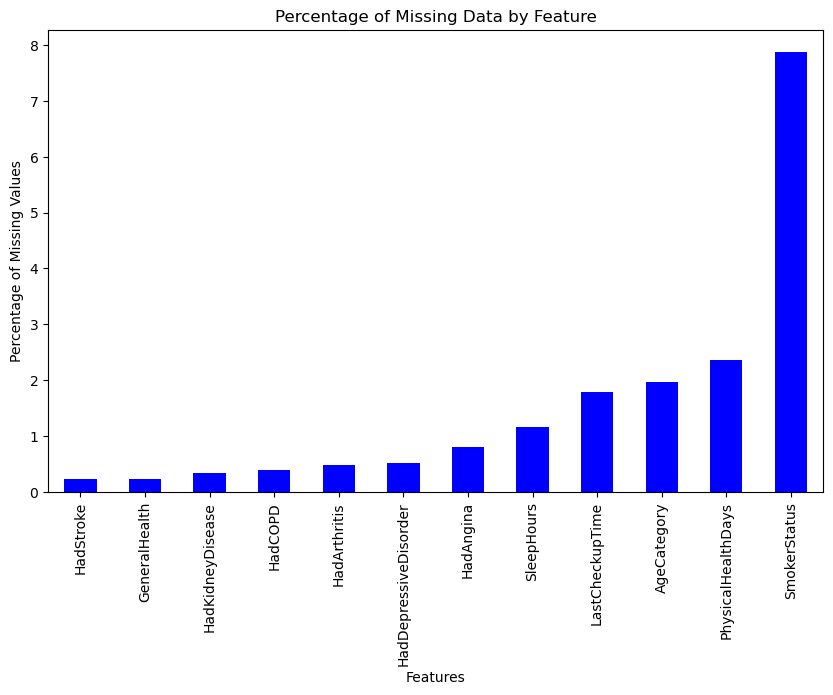

In [278]:
missing_data = (df.isnull().sum() / len(df)) * 100
missing_data = missing_data[missing_data > 0]
missing_data.sort_values(inplace=True)

plt.figure(figsize=(10, 6))
missing_data.plot.bar(color='blue')
plt.title('Percentage of Missing Data by Feature')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.show()

In [279]:
# Check correlations with missing data
missing_corr = df.isnull().corr()
print(missing_corr)

                       HadHeartAttack  HadAngina  PhysicalHealthDays  \
HadHeartAttack                    NaN        NaN                 NaN   
HadAngina                         NaN   1.000000            0.030794   
PhysicalHealthDays                NaN   0.030794            1.000000   
PhysicalActivities                NaN        NaN                 NaN   
HadStroke                         NaN   0.041849            0.015497   
HadDiabetes                       NaN        NaN                 NaN   
SmokerStatus                      NaN   0.000340            0.023604   
GeneralHealth                     NaN   0.016951            0.060075   
SleepHours                        NaN   0.028082            0.083427   
HadDepressiveDisorder             NaN   0.031087            0.021747   
HadCOPD                           NaN   0.047475            0.026597   
HadKidneyDisease                  NaN   0.049089            0.021438   
HadArthritis                      NaN   0.029528            0.01

/Users/asalzooashkiany/anaconda3/envs/test_env/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


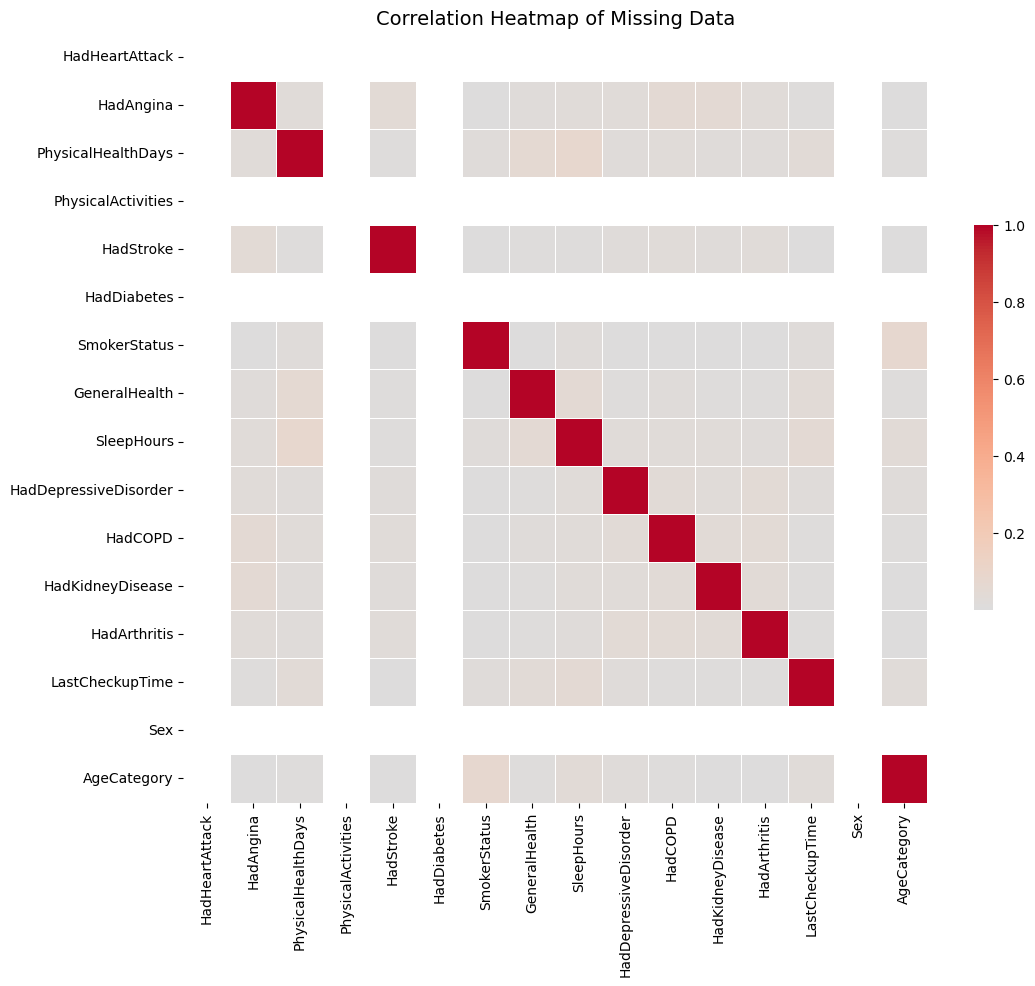

In [280]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a binary DataFrame where 1 indicates a missing value and 0 indicates a non-missing value
missing_df = df.isnull().astype(int)

# Calculate the correlation matrix for the missing data indicators
missing_corr = missing_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(missing_corr, cmap='coolwarm', center=0,
            linewidths=.5, cbar_kws={'shrink': .5}, annot=True, fmt=".2f")

# Improve readability with appropriate font sizes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set the title and labels
plt.title('Correlation Heatmap of Missing Data', fontsize=14)

# Show the heatmap
plt.show()


### Seeing if there is rows with more than 3 nans and unknown and if yes how many 

In [281]:
df['nan_count'] = df.isnull().sum(axis=1)

rows_with_3_or_more_nans = df[df['nan_count'] >= 3]

# Additionally, you may want to identify rows where AgeCategory is 'Unknown'
# This assumes that 'Unknown' is a string value in the AgeCategory column
rows_with_unknown_age = df[df['AgeCategory'] == 'Unknown']

# To handle both conditions together, we can use the logical or operator '|'
rows_to_drop = df[(df['nan_count'] >= 3) | (df['AgeCategory'] == 'Unknown')]
len(rows_to_drop)

1349

### droping the rows with 3 and more Nans and unkown since i have enough data

In [282]:
# Drop these rows from the DataFrame
df_cleaned = df.drop(rows_to_drop.index)

In [283]:
df_cleaned.isnull().sum()

HadHeartAttack               0
HadAngina                 3221
PhysicalHealthDays        9749
PhysicalActivities           0
HadStroke                  917
HadDiabetes                  0
SmokerStatus             33928
GeneralHealth              868
SleepHours                4520
HadDepressiveDisorder     2064
HadCOPD                   1499
HadKidneyDisease          1319
HadArthritis              1953
LastCheckupTime           7377
Sex                          0
AgeCategory               8211
nan_count                    0
dtype: int64

In [284]:
df_cleaned = df

In [285]:
df.dtypes

HadHeartAttack            object
HadAngina                 object
PhysicalHealthDays       float64
PhysicalActivities        object
HadStroke                 object
HadDiabetes               object
SmokerStatus              object
GeneralHealth             object
SleepHours               float64
HadDepressiveDisorder     object
HadCOPD                   object
HadKidneyDisease          object
HadArthritis              object
LastCheckupTime           object
Sex                       object
AgeCategory               object
nan_count                  int64
dtype: object

### using a sample of data since it's a big data and can take a lot of time to rin KNN

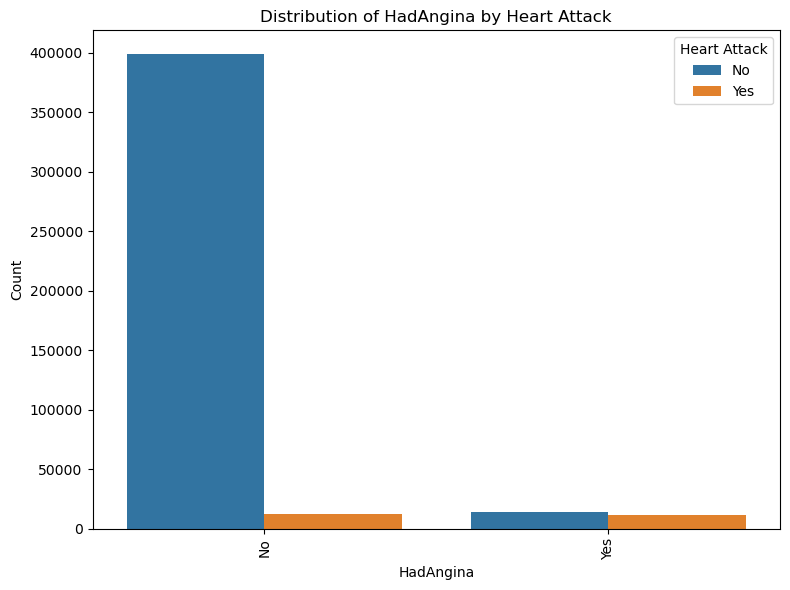

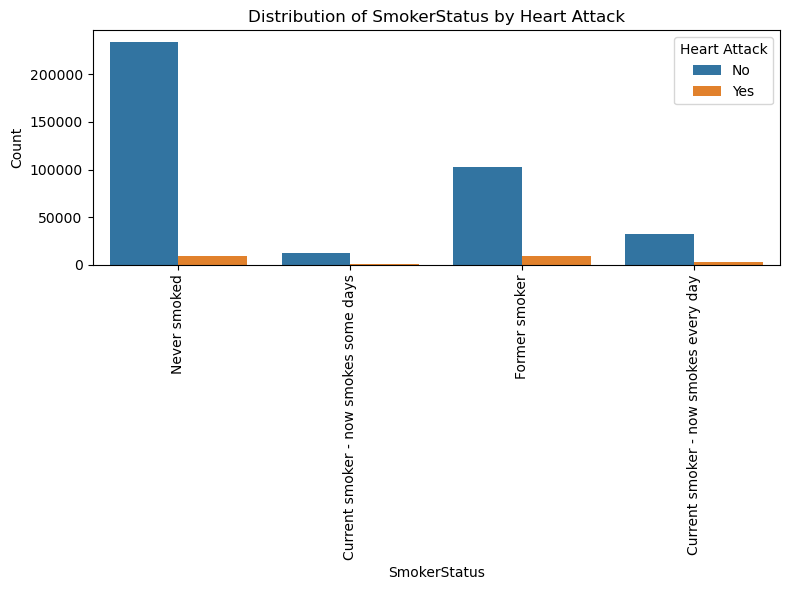

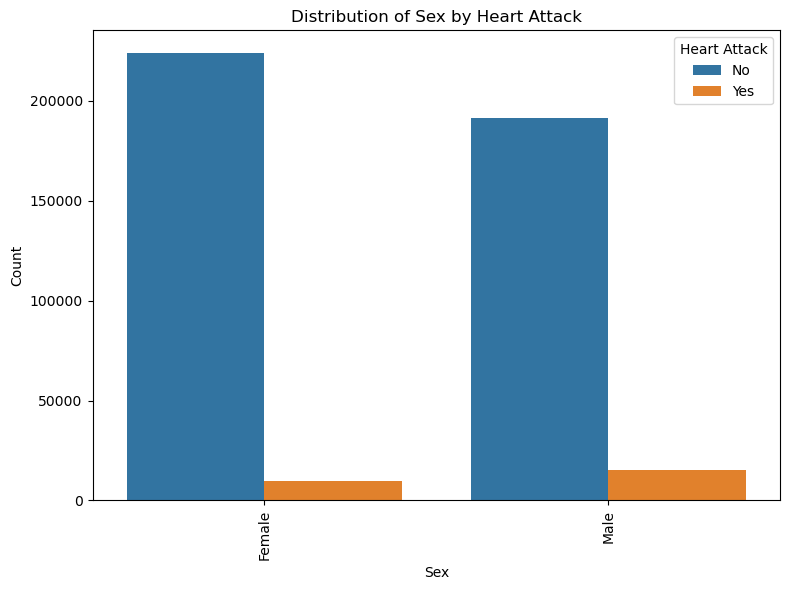

In [286]:
# Assuming 'categorical_columns' is a list of your categorical column names
categorical_columns = ['HadAngina', 'SmokerStatus', 'Sex']  # example list

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, hue='HadHeartAttack', data=df)
    plt.title(f'Distribution of {column} by Heart Attack')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='Heart Attack')
    plt.tight_layout()
    plt.show()

# 3-Encoding categorie columns 

## Changing age Groupings lable:
**Young Adults (18-39):** Combining 'Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39'

**Middle-aged Adults (40-59):** Combining 'Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59'

**Senior Adults (60-79):** Combining 'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79'

**Elderly (80 and older):** 'Age 80 or older'

In [287]:
df_agecategory_values = df['AgeCategory'].value_counts()
df_agecategory_values

AgeCategory
Age 65 to 69       46635
Age 60 to 64       44057
Age 70 to 74       43033
Age 55 to 59       36500
Age 80 or older    35534
Age 50 to 54       33341
Age 75 to 79       32102
Age 40 to 44       29701
Age 45 to 49       28315
Age 35 to 39       28294
Age 18 to 24       26663
Age 30 to 34       25609
Age 25 to 29       21826
Name: count, dtype: int64

In [288]:

def categorize_age(age):
    if age in ['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39']:
        return 'Young Adults (18-39)'
    elif age in ['Age 40 to 44', 'Age 45 to 49', 'Age 50 to 54', 'Age 55 to 59']:
        return 'Middle-aged Adults (40-59)'
    elif age in ['Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79']:
        return 'Senior Adults (60-79)'
    elif age == 'Age 80 or older':
        return 'Elderly (80 and older)'
    else:
        return 'Unknown'  # For any data that does not fit the categories

# Applying the categorization function to the 'AgeCategory' column
df['AgeCategory'] = df['AgeCategory'].apply(categorize_age)


In [289]:
df_agecategory_values = df['AgeCategory'].value_counts()
df_agecategory_values

AgeCategory
Senior Adults (60-79)         165827
Middle-aged Adults (40-59)    127857
Young Adults (18-39)          102392
Elderly (80 and older)         35534
Unknown                         8683
Name: count, dtype: int64

### they got removed when there were 3 and more Nans and were unknown

In [290]:
df_agecategory_values = df_cleaned['AgeCategory'].value_counts()
df_agecategory_values

AgeCategory
Senior Adults (60-79)         165827
Middle-aged Adults (40-59)    127857
Young Adults (18-39)          102392
Elderly (80 and older)         35534
Unknown                         8683
Name: count, dtype: int64

## Encoding Age Categories

In the dataset, the `AgeCategory` column consists of four distinct age groups. To prepare this categorical data for machine learning algorithms, we encode these categories as integer values ranging from 0 to 3 as follows:

- **Young Adults (18-39)** are encoded as `0`.
- **Middle-aged Adults (40-59)** are encoded as `1`.
- **Senior Adults (60-79)** are encoded as `2`.
- **Elderly (80 and older)** are encoded as `3`.


In [291]:
age_category_mapping = {
    'Young Adults (18-39)': 0,
    'Middle-aged Adults (40-59)': 1,
    'Senior Adults (60-79)': 2,
    'Elderly (80 and older)': 3
}

# Apply the mapping to the 'AgeCategory' column
df['AgeCategory']= df['AgeCategory'].map(age_category_mapping)

## checking LastCheckupTimes unique values 

In [292]:
LastCheckupTime_unique_values = df['LastCheckupTime'].value_counts()
LastCheckupTime_unique_values

LastCheckupTime
Within past year (anytime less than 12 months ago)         347373
Within past 2 years (1 year but less than 2 years ago)      41542
Within past 5 years (2 years but less than 5 years ago)     24651
5 or more years ago                                         18834
Name: count, dtype: int64

## Encoding Last Checkup Time

The `LastCheckupTime` column contains information about when respondents last had a checkup. We convert these textual timeframes into a numerical format, facilitating their use in computational analyses. The encoding is as follows:

- **Within past year (anytime less than 12 months ago)** is encoded as `0`.
- **Within past 2 years (1 year but less than 2 years ago)** is encoded as `1`.
- **Within past 5 years (2 years but less than 5 years ago)** is encoded as `2`.
- **5 or more years ago** is encoded as `3`.

In [293]:
LastCheckupTime_mapping = {
    'Within past year (anytime less than 12 months ago)': 0,
    'Within past 2 years (1 year but less than 2 years ago)': 1,
    'Within past 5 years (2 years but less than 5 years ago)': 2,
    '5 or more years ago': 3
}

# Apply the mapping to the 'AgeCategory' column
df['LastCheckupTime']= df['LastCheckupTime'].map(LastCheckupTime_mapping)

## checking SmokerStatus unique values 

In [294]:
SmokerStatus_unique_values = df['SmokerStatus'].value_counts()
SmokerStatus_unique_values

SmokerStatus
Never smoked                             243772
Former smoker                            112619
Current smoker - now smokes every day     35476
Current smoker - now smokes some days     13753
Name: count, dtype: int64

## Encoding Smoker Status

The `SmokerStatus` column categorizes respondents' smoking habits. For analysis purposes, we transform these categories into numerical codes:

- **Never smoked**: Encoded as `0`.
- **Former smoker**: Encoded as `1`.
- **Current smoker - now smokes every day**: Encoded as `2`.
- **Current smoker - now smokes some days**: Encoded as `3`.

In [295]:
# Defining a mapping for the SmokerStatus categories 
smoker_status_mapping = {
    'Never smoked': 0,
    'Former smoker': 1,
    'Current smoker - now smokes every day': 2,
    'Current smoker - now smokes some days': 3
}

# Apply the mapping to the 'SmokerStatus' column
df['SmokerStatus'] = df['SmokerStatus'].map(smoker_status_mapping)

## checking GeneralHealth unique values 

In [296]:
GeneralHealth_unique_values = df['GeneralHealth'].value_counts()
GeneralHealth_unique_values

GeneralHealth
Very good    147586
Good         141922
Excellent     71448
Fair          59163
Poor          19113
Name: count, dtype: int64

## Encoding General Health Status

In our dataset, the `GeneralHealth` column reflects respondents' self-assessment of their overall health. To facilitate quantitative analysis, these textual descriptors are converted to a numeric scale:

- **Excellent**: Encoded as `0`.
- **Very good**: Encoded as `1`.
- **Good**: Encoded as `2`.
- **Fair**: Encoded as `3`.
- **Poor**: Encoded as `4`.

In [297]:
general_health_mapping = {
    'Excellent': 0,
    'Very good': 1,
    'Good': 2,
    'Fair': 3,
    'Poor': 4
}

# Apply the mapping to the 'GeneralHealth' column
df['GeneralHealth'] = df['GeneralHealth'].map(general_health_mapping)

In [298]:
df = df.drop(columns=['nan_count'])  

In [299]:
df.head()

,HadHeartAttack,HadAngina,PhysicalHealthDays,PhysicalActivities,HadStroke,HadDiabetes,SmokerStatus,GeneralHealth,SleepHours,HadDepressiveDisorder,HadCOPD,HadKidneyDisease,HadArthritis,LastCheckupTime,Sex,AgeCategory
0,No,No,0.0,No,No,Yes,0.0,1.0,8.0,No,No,No,No,0.0,Female,3.0
1,No,No,0.0,No,No,No,0.0,0.0,6.0,No,No,No,No,NaN,Female,3.0
2,No,No,2.0,Yes,No,No,0.0,1.0,5.0,No,No,No,No,0.0,Female,1.0
3,No,No,0.0,Yes,No,No,3.0,0.0,7.0,No,No,No,Yes,0.0,Female,NaN
4,No,No,2.0,Yes,No,No,0.0,3.0,9.0,No,No,No,No,0.0,Female,1.0


## checking **PhysicalHealthDays**  unique values 

In [300]:
PhysicalHealthDays_unique_values = df['PhysicalHealthDays'].value_counts()
PhysicalHealthDays_unique_values

PhysicalHealthDays
0.0     265686
30.0     32367
2.0      25059
1.0      17110
3.0      15801
5.0      15152
10.0     10462
7.0       9237
15.0      8646
4.0       8394
20.0      5322
14.0      4971
6.0       2500
25.0      2129
8.0       1738
12.0      1087
21.0      1025
28.0       740
9.0        401
29.0       359
18.0       262
16.0       251
27.0       187
17.0       182
13.0       158
11.0       157
22.0       139
24.0       121
26.0       107
23.0        97
19.0        47
Name: count, dtype: int64

## Converting Yes/No to 0/1 in Dataset Columns

### Columns tht are Transformed:

- **HadHeartAttack**
- **HadAngina**
- **PhysicalActivities**
- **HadStroke**
- **HadDiabetes**
- **HadDepressiveDisorder**
- **HadCOPD**
- **HadKidneyDisease**
- **HadArthritis**


In [301]:
# Define the columns we want to change
columns_to_change = [
    "HadHeartAttack", "HadAngina", "PhysicalActivities", "HadStroke", 
    "HadDiabetes", "HadDepressiveDisorder", "HadCOPD", 
    "HadKidneyDisease", "HadArthritis"
]

# Replacing 'yes' and 'no' with 1 and 0 respectively
df[columns_to_change] = df[columns_to_change].replace({'Yes': 1, 'No': 0})


/var/folders/t6/3h0vl0v113d71wg6sc1hsgvr0000gn/T/ipykernel_22105/3728014479.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_change] = df[columns_to_change].replace({'Yes': 1, 'No': 0})


## Converting **Female/Male** to **1/0** in Columns **Sex**

In [302]:
# Replacing 'yes' and 'no' with 1 and 0 respectively
df['Sex'] = df['Sex'].replace({'Female': 1, 'Male': 0})

/var/folders/t6/3h0vl0v113d71wg6sc1hsgvr0000gn/T/ipykernel_22105/3441063477.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'Female': 1, 'Male': 0})


## foundout i have two more types of categorie for **HadDiabetes** so i'm generelizing and adding them as a yes and no

In [303]:
HadDiabetes_unique_values = df['HadDiabetes'].value_counts()
HadDiabetes_unique_values

HadDiabetes
0                                          365933
1                                           60379
No, pre-diabetes or borderline diabetes     10178
Yes, but only during pregnancy (female)      3803
Name: count, dtype: int64

In [304]:
# Define the mapping
diabetes_mapping = {
    "365933": 2,  
    "60379": 3,   
    "No, pre-diabetes or borderline diabetes": 0,
    "Yes, but only during pregnancy (female)": 1
}

# Apply the mapping to the 'HadDiabetes' column
df['HadDiabetes'] = df['HadDiabetes'].map(diabetes_mapping)

### since most of the data in  **"HadHeartAttack", "HadAngina", "PhysicalActivities", "HadStroke", "HadDiabetes", "HadDepressiveDisorder", "HadCOPD", "HadKidneyDisease" and "HadArthritis"** columns is yes and no i decided to use `K-Nearest Neighbors (KNN) Imputation`

**1. n_neighbors**
The n_neighbors parameter specifies the number of nearest neighbors to consider when imputing a missing value. In the example `n_neighbors=5`, the imputer will look at the 5 nearest neighbors 

**2. weights**
The weights parameter controls how much influence each of the selected neighbors has on the imputed value.`uniform`: Each of the k neighbors contributes equally to the final value. This is the simplest form of weighting and assumes that all neighbors are equally important in predicting the missing value, regardless of their actual distance from the point being imputed.

In [307]:
columns_to_change = [
    "HadHeartAttack", "HadAngina", "PhysicalActivities", "HadStroke", 
    "HadDiabetes", "HadDepressiveDisorder", "HadCOPD", 
    "HadKidneyDisease", "HadArthritis"
]

# Selected a 20% random sample of the data
sample_df = df.sample(frac=0.2, random_state=42)  # Corrected to 20% as specified

#  Initializing the KNN Imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform')

# Fiting and transforming the sampled dataset but only for specified columns
sample_df[columns_to_change] = imputer.fit_transform(sample_df[columns_to_change])

df[columns_to_change] = imputer.transform(df[columns_to_change])

In [308]:
df.isnull().sum()

HadHeartAttack               0
HadAngina                    0
PhysicalHealthDays       10399
PhysicalActivities           0
HadStroke                    0
HadDiabetes                  0
SmokerStatus             34673
GeneralHealth             1061
SleepHours                5084
HadDepressiveDisorder        0
HadCOPD                      0
HadKidneyDisease             0
HadArthritis                 0
LastCheckupTime           7893
Sex                          0
AgeCategory               8683
dtype: int64

In [309]:
df

,HadHeartAttack,HadAngina,PhysicalHealthDays,PhysicalActivities,HadStroke,HadDiabetes,SmokerStatus,GeneralHealth,SleepHours,HadDepressiveDisorder,HadCOPD,HadKidneyDisease,HadArthritis,LastCheckupTime,Sex,AgeCategory
0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,1,3.0
1,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,6.0,0.0,0.0,0.0,0.0,NaN,1,3.0
2,0.0,0.0,2.0,1.0,0.0,0.6,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1,1.0
3,0.0,0.0,0.0,1.0,0.0,0.2,3.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,1,NaN
4,0.0,0.0,2.0,1.0,0.0,0.6,0.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,0.0,0.0,0.0,1.0,0.0,0.6,0.0,2.0,6.0,1.0,0.0,0.0,0.0,1.0,1,0.0
445128,0.0,0.0,2.0,1.0,0.0,0.6,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1,1.0
445129,0.0,0.0,30.0,0.0,0.0,0.4,2.0,4.0,5.0,0.0,0.0,0.0,0.0,3.0,1,2.0
445130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0,2.0


### looking to see how skewd the PhysicalHealthDays is to decied what to do with NULLs

**Mean vs. Median:** The mean (4.31) is greater than the median (0). In a symmetric distribution, the mean and median are approximately equal. Here, the mean is higher due to the influence of higher values.

**Quartiles:** The 25% and 50% percentiles are both 0, indicating that a significant portion of the data cluster at the lower end of the scale, while the upper end (from 3 to 30) pulls the mean upward.

**Max Value:** The maximum value (30) is quite distant from the mean and median, suggesting a long right tail in the distribution, typical of positive skew.

In [310]:
print(df['PhysicalHealthDays'].describe())

count    429894.000000
mean          4.312556
std           8.650761
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: PhysicalHealthDays, dtype: float64


### I decided for handling missing values to consider the median (0)

In [311]:
df['PhysicalHealthDays'] = df['PhysicalHealthDays'].fillna(0)

In [319]:
df.isnull().sum()

HadHeartAttack               0
HadAngina                    0
PhysicalHealthDays           0
PhysicalActivities           0
HadStroke                    0
HadDiabetes                  0
SmokerStatus             34673
GeneralHealth             1061
SleepHours                   0
HadDepressiveDisorder        0
HadCOPD                      0
HadKidneyDisease             0
HadArthritis                 0
LastCheckupTime              0
Sex                          0
AgeCategory               8683
dtype: int64

In [314]:
df.describe()

,HadHeartAttack,HadAngina,PhysicalHealthDays,PhysicalActivities,HadStroke,HadDiabetes,SmokerStatus,GeneralHealth,SleepHours,HadDepressiveDisorder,HadCOPD,HadKidneyDisease,HadArthritis,LastCheckupTime,Sex,AgeCategory
count,440293.000000,440293.000000,440293.000000,440293.000000,440293.000000,440293.000000,405620.000000,439232.000000,435209.000000,440293.000000,440293.00000,440293.000000,440293.000000,432400.000000,440293.000000,431610.000000
mean,0.056644,0.060674,4.210701,0.761391,0.042800,0.401004,0.554287,1.560385,7.023324,0.206181,0.08012,0.045666,0.341526,0.340763,0.530740,1.311631
std,0.231162,0.237318,8.573042,0.426234,0.202159,0.221183,0.790831,1.049842,1.495099,0.403702,0.27066,0.208186,0.473133,0.774600,0.499055,0.923928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.200000,0.000000,1.000000,6.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,0.400000,0.000000,2.000000,7.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.000000,3.000000,1.000000,0.000000,0.600000,1.000000,2.000000,8.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,2.000000
max,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,3.000000,4.000000,24.000000,1.000000,1.00000,1.000000,1.000000,3.000000,1.000000,3.000000


/Users/asalzooashkiany/anaconda3/envs/test_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asalzooashkiany/anaconda3/envs/test_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


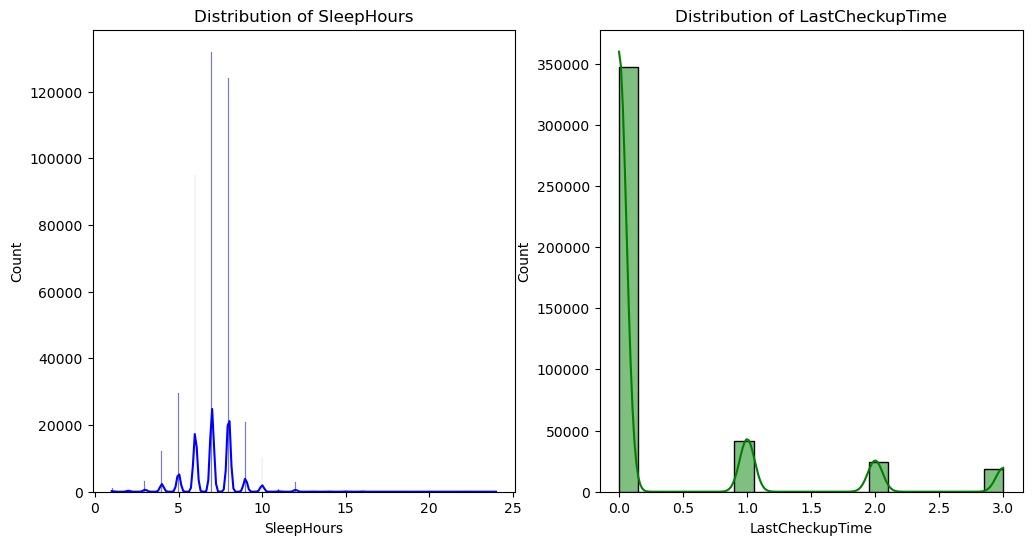

In [315]:
# Check skewness visually
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['SleepHours'].dropna(), kde=True, color='blue')
plt.title('Distribution of SleepHours')

plt.subplot(1, 2, 2)
sns.histplot(df['LastCheckupTime'].dropna(), kde=True, color='green')
plt.title('Distribution of LastCheckupTime')

plt.show()

### For **SleepHours** I can use mean or median  since they are the same. Also pepole ususally sleep between 7 to 9 hours 

In [316]:
df['SleepHours'].fillna(df['SleepHours'].median(), inplace=True)

/var/folders/t6/3h0vl0v113d71wg6sc1hsgvr0000gn/T/ipykernel_22105/3943339094.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SleepHours'].fillna(df['SleepHours'].median(), inplace=True)


### for **LastCheckupTime** i'm using 0 since most of it is 0

In [318]:
df['LastCheckupTime'] = df['LastCheckupTime'].fillna(0)

### Used KNN fo **"SmokerStatus", "GeneralHealth" and "AgeCategory""** Null data

In [328]:
columns_to_change = [
    "SmokerStatus", "GeneralHealth","AgeCategory"
]
sample_df = df.sample(frac=0.2, random_state=42)
imputer = KNNImputer(n_neighbors=5, weights='uniform')

# Fit and transform the sampled dataset for specified columns
sample_df[columns_to_change] = imputer.fit_transform(sample_df[columns_to_change])

# Apply the trained imputer to the full dataset
df[columns_to_change] = imputer.transform(df[columns_to_change])


In [329]:
# Optionally ensure DataFrame format is retained
df[columns_to_change] = pd.DataFrame(df[columns_to_change], columns=columns_to_change)

In [332]:
df

,HadHeartAttack,HadAngina,PhysicalHealthDays,PhysicalActivities,HadStroke,HadDiabetes,SmokerStatus,GeneralHealth,SleepHours,HadDepressiveDisorder,HadCOPD,HadKidneyDisease,HadArthritis,LastCheckupTime,Sex,AgeCategory
0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,1,3.0
1,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1,3.0
2,0.0,0.0,2.0,1.0,0.0,0.6,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1,1.0
3,0.0,0.0,0.0,1.0,0.0,0.2,3.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,1,1.2
4,0.0,0.0,2.0,1.0,0.0,0.6,0.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,0.0,0.0,0.0,1.0,0.0,0.6,0.0,2.0,6.0,1.0,0.0,0.0,0.0,1.0,1,0.0
445128,0.0,0.0,2.0,1.0,0.0,0.6,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1,1.0
445129,0.0,0.0,30.0,0.0,0.0,0.4,2.0,4.0,5.0,0.0,0.0,0.0,0.0,3.0,1,2.0
445130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0,2.0


## 4- Adding more columns to make the model more complicated 

In [337]:
df['BMI'] = dataset['BMI']
df['RaceEthnicityCategory'] = dataset['RaceEthnicityCategory']

In [338]:
df

,HadHeartAttack,HadAngina,PhysicalHealthDays,PhysicalActivities,HadStroke,HadDiabetes,SmokerStatus,GeneralHealth,SleepHours,HadDepressiveDisorder,HadCOPD,HadKidneyDisease,HadArthritis,LastCheckupTime,Sex,AgeCategory,BMI,RaceEthnicityCategory
0,0.0,0.0,0.0,0.0,0.0,0.4,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,1,3.0,NaN,"White only, Non-Hispanic"
1,0.0,0.0,0.0,0.0,0.0,0.4,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1,3.0,26.57,"White only, Non-Hispanic"
2,0.0,0.0,2.0,1.0,0.0,0.6,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,1,1.0,25.61,"White only, Non-Hispanic"
3,0.0,0.0,0.0,1.0,0.0,0.2,3.0,0.0,7.0,0.0,0.0,0.0,1.0,0.0,1,1.2,23.30,"White only, Non-Hispanic"
4,0.0,0.0,2.0,1.0,0.0,0.6,0.0,3.0,9.0,0.0,0.0,0.0,0.0,0.0,1,1.0,21.77,"White only, Non-Hispanic"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,0.0,0.0,0.0,1.0,0.0,0.6,0.0,2.0,6.0,1.0,0.0,0.0,0.0,1.0,1,0.0,25.63,"Black only, Non-Hispanic"
445128,0.0,0.0,2.0,1.0,0.0,0.6,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,1,1.0,28.66,"Black only, Non-Hispanic"
445129,0.0,0.0,30.0,0.0,0.0,0.4,2.0,4.0,5.0,0.0,0.0,0.0,0.0,3.0,1,2.0,17.23,NaN
445130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0,2.0,32.55,"Black only, Non-Hispanic"


In [339]:
BMI_unique_values = df['BMI'].value_counts()
BMI_unique_values

BMI
26.63    4223
27.46    3253
24.41    3163
27.44    3102
27.12    3092
         ... 
20.17       1
47.28       1
60.26       1
51.04       1
48.63       1
Name: count, Length: 3968, dtype: int64

In [342]:
BMI_null = df['BMI'].isnull().sum()
BMI_null

47708

### filling BMI's nulls with the average of each group of agecategorie 

In [346]:
# Calculate the average BMI for each AgeCategory
average_bmi_per_age_category = df.groupby('AgeCategory')['BMI'].mean()
average_bmi_per_age_category

AgeCategory
0.000000    27.908853
0.400000    39.870000
0.600000    25.479330
0.800000    27.634375
1.000000    29.642670
1.200000    26.710273
1.312446    25.650000
1.400000    26.710223
1.600000    28.309244
1.800000    26.778063
2.000000    28.558036
2.200000    27.962370
2.400000    29.610072
2.600000    30.775538
3.000000    26.354172
Name: BMI, dtype: float64

In [348]:
# Filling the nulls in the BMI column with the average BMI of the corresponding AgeCategory group
df['BMI'] = df.apply(
    lambda row: average_bmi_per_age_category[row['AgeCategory']] if pd.isnull(row['BMI']) else row['BMI'],
    axis=1
)

In [349]:
BMI_null = df['BMI'].isnull().sum()
BMI_null

0

In [343]:
RaceEthnicityCategory_unique_values = df['RaceEthnicityCategory'].value_counts()
RaceEthnicityCategory_unique_values

RaceEthnicityCategory
White only, Non-Hispanic         317743
Hispanic                          42279
Black only, Non-Hispanic          34972
Other race only, Non-Hispanic     22319
Multiracial, Non-Hispanic          9455
Name: count, dtype: int64

In [344]:
RaceEthnicityCategory_null = df['RaceEthnicityCategory'].isnull().sum()
RaceEthnicityCategory_null

13525

In [351]:
# Filter the DataFrame to only include rows where 'RaceEthnicityCategory' is null
null_race_df = df[df['RaceEthnicityCategory'].isnull()]

# Count the occurrences of 0 and 1 in 'HadHeartAttack' for the filtered rows
had_heart_attack_counts = null_race_df['HadHeartAttack'].value_counts()

# Display the counts
had_heart_attack_counts


HadHeartAttack
0.0    12666
1.0      859
Name: count, dtype: int64

In [352]:
# Imputing missing 'RaceEthnicityCategory' with the most common value
most_common_race = df['RaceEthnicityCategory'].mode()[0]
df['RaceEthnicityCategory'].fillna(most_common_race, inplace=True)

/var/folders/t6/3h0vl0v113d71wg6sc1hsgvr0000gn/T/ipykernel_22105/1154546972.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RaceEthnicityCategory'].fillna(most_common_race, inplace=True)


# 4- saving my cleaned df

In [355]:
df.to_csv('/Users/asalzooashkiany/Documents/LHL_final_project/data/cleaned_csv.csv', index=False)